In [9]:
from pathlib import Path
import pickle
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.cluster import DBSCAN
import simplekml
from smount_predictors import SeamountHelp, SeamountTransformer
import xarray as xr
import pygmt

In [10]:
points = SeamountHelp.readKMLbounds(Path('data/Seamount_training_zone.kml'))

/var/folders/v7/nxggzv_j5s936v9rvl85gh2w0000gn/T/ipykernel_2445/1941173630.py:17: FutureWarning: The 'interval' parameter has been deprecated since v0.12.0 and will be removed in v0.16.0. Please use 'levels' instead.
  fig.grdcontour(


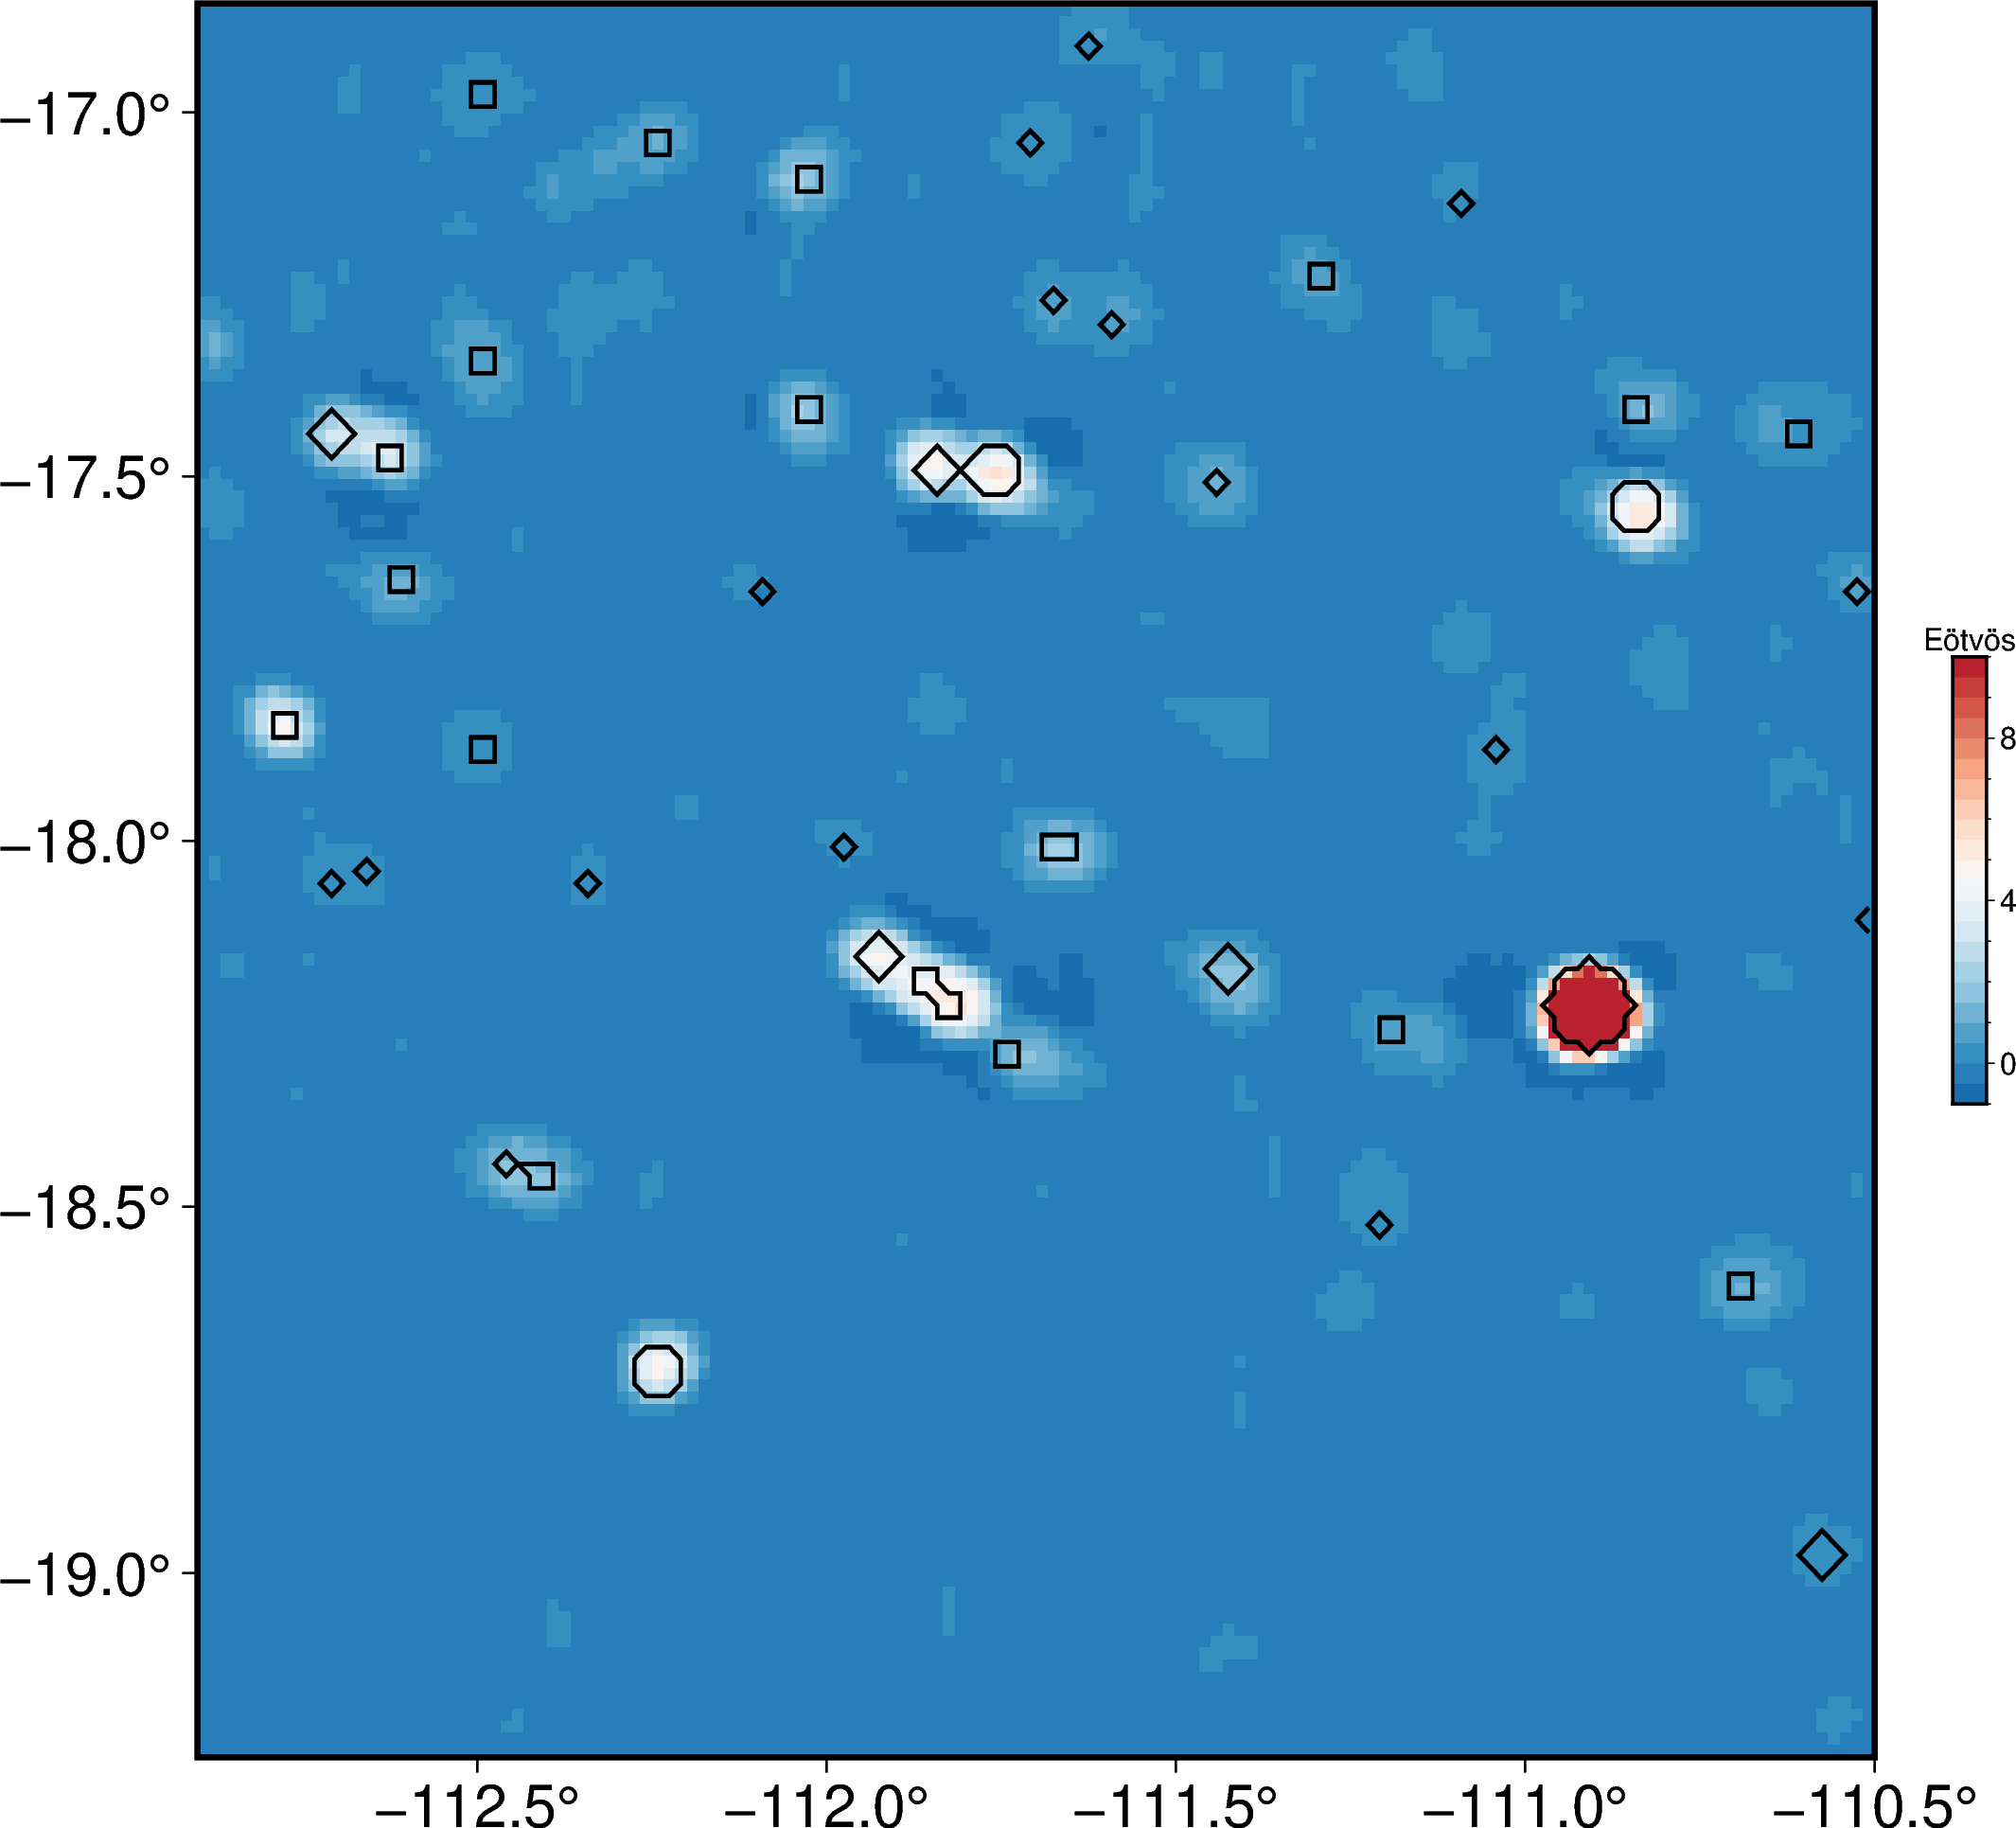

In [11]:

vgg_train_zone = xr.open_dataset('data/figure_datasets/full_trans.nc')
vgg_train_zone['z'] = vgg_train_zone['z'].transpose()
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT_LABEL="15p,Helvetica,black", FONT_ANNOT="15p")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Helvetica,black")

############################ SWIR ##################################
pygmt.makecpt(cmap="data/colors.cpt", series=[-1, 10, 0.5], background='o')
fig.grdimage(
    grid = xr.DataArray(vgg_train_zone.z, coords=(vgg_train_zone.lat, vgg_train_zone.lon)),
    # shading = shade_SWIR,
    projection="M15c",
    region = [points[2], points[3], points[0], points[1]],
    frame=["WSrt", "xa0.5", "ya0.5"],
    cmap = True,
)
fig.grdcontour(
    grid=xr.open_dataset('data/training_data_new.nc')['Labels'],
    annotation="200+f12p", 
    interval=1,
    pen = "1p, black",
    limit=[-1, 2]
    )

fig.colorbar(position="JML+o-16c/0c+w4c/0.3c+m", frame=["xa4f1", "y+lEötvös"])
# old_vgg_file = xr.open_dataset("/Volumes/envisat2/SWOT/src/sandwell/grid_swot/curv_32.1.nc")
fig.show()

/var/folders/v7/nxggzv_j5s936v9rvl85gh2w0000gn/T/ipykernel_2445/2592338612.py:18: FutureWarning: The 'interval' parameter has been deprecated since v0.12.0 and will be removed in v0.16.0. Please use 'levels' instead.
  fig.grdcontour(


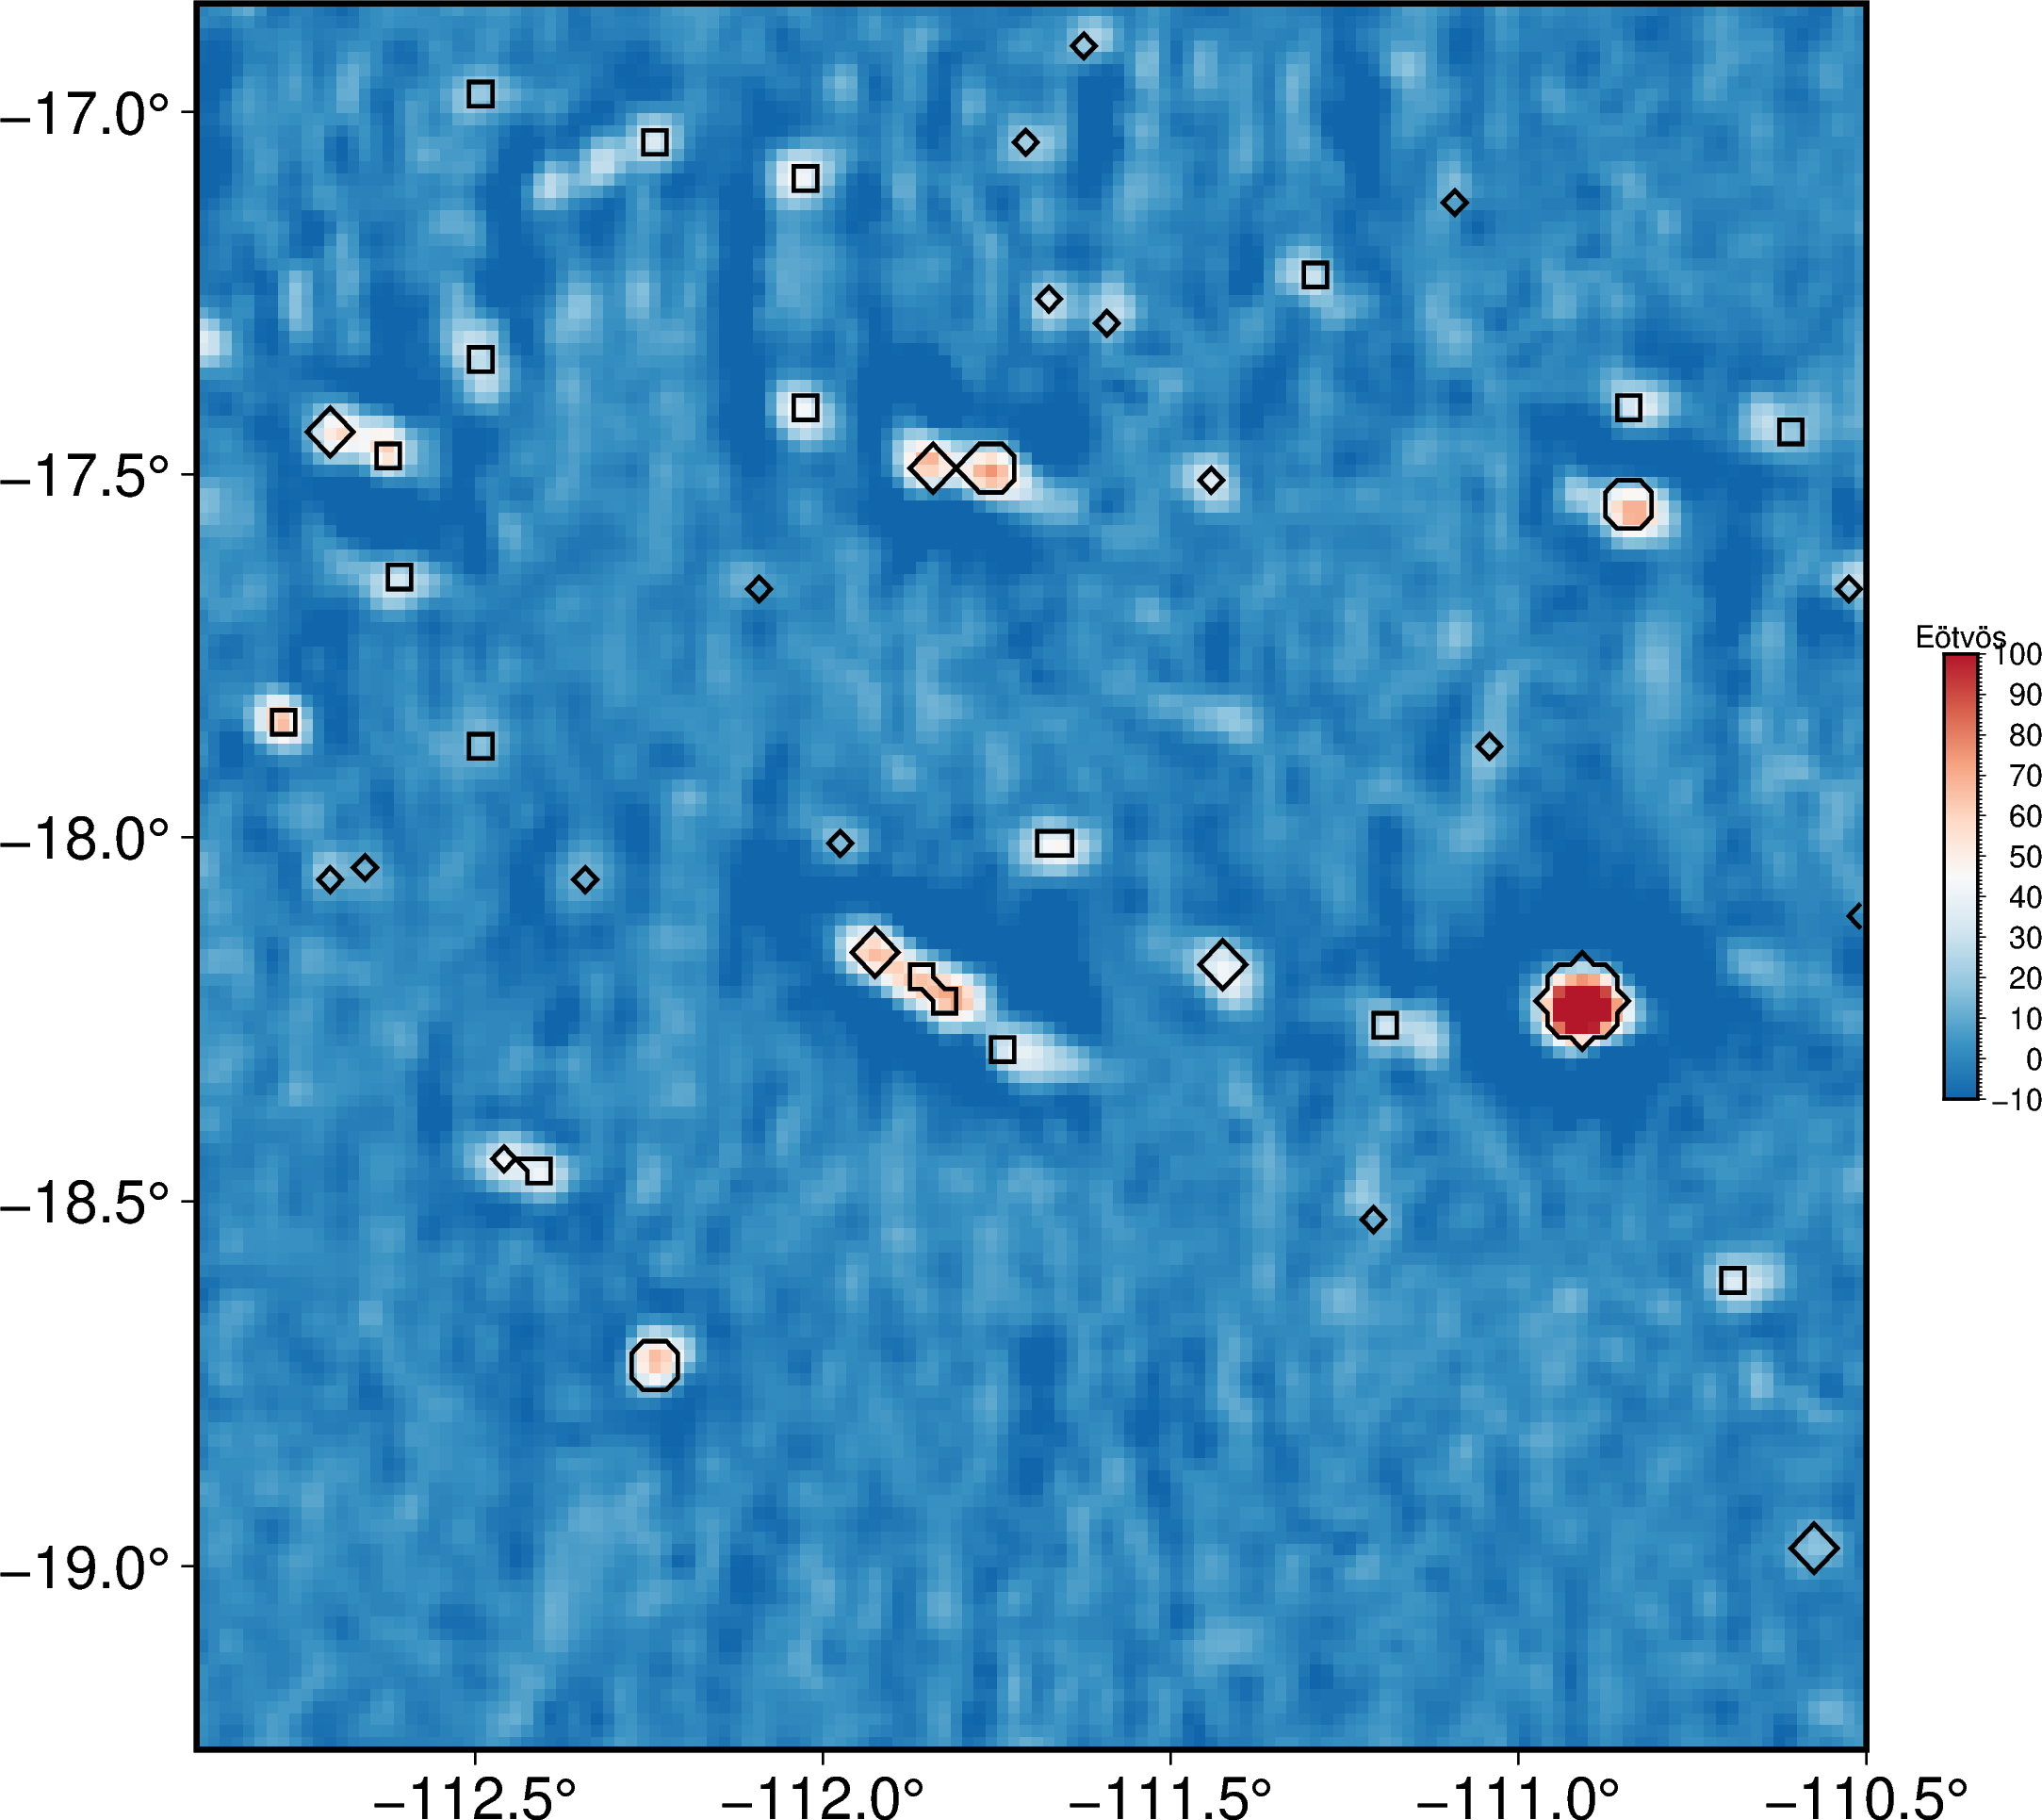

In [27]:
import pygmt

vgg_train_zone = xr.open_dataset('data/figure_datasets/raw_data.nc')
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT_LABEL="15p,Helvetica,black", FONT_ANNOT="15p")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Helvetica,black")

############################ SWIR ##################################
pygmt.makecpt(cmap="data/colors.cpt", series=[-10, 100, 0.5], background='o')
fig.grdimage(
    grid = xr.DataArray(vgg_train_zone.z, coords=(vgg_train_zone.lat, vgg_train_zone.lon)),
    # shading = shade_SWIR,
    projection="M15c",
    region = [points[2], points[3], points[0], points[1]],
    frame=["WSrt", "xa0.5", "ya0.5"],
    cmap = True,
)
fig.grdcontour(
    grid=xr.open_dataset('data/training_data_new.nc')['Labels'],
    annotation="200+f12p", 
    interval=1,
    pen = "1p, black",
    limit=[-1, 2]
    )

fig.colorbar(position="JML+o-16c/0c+w4c/0.3c+m", frame=["xa10f1", "y+lEötvös"])
# old_vgg_file = xr.open_dataset("/Volumes/envisat2/SWOT/src/sandwell/grid_swot/curv_32.1.nc")
fig.show()

/var/folders/v7/nxggzv_j5s936v9rvl85gh2w0000gn/T/ipykernel_2445/1844773600.py:17: FutureWarning: The 'interval' parameter has been deprecated since v0.12.0 and will be removed in v0.16.0. Please use 'levels' instead.
  fig.grdcontour(


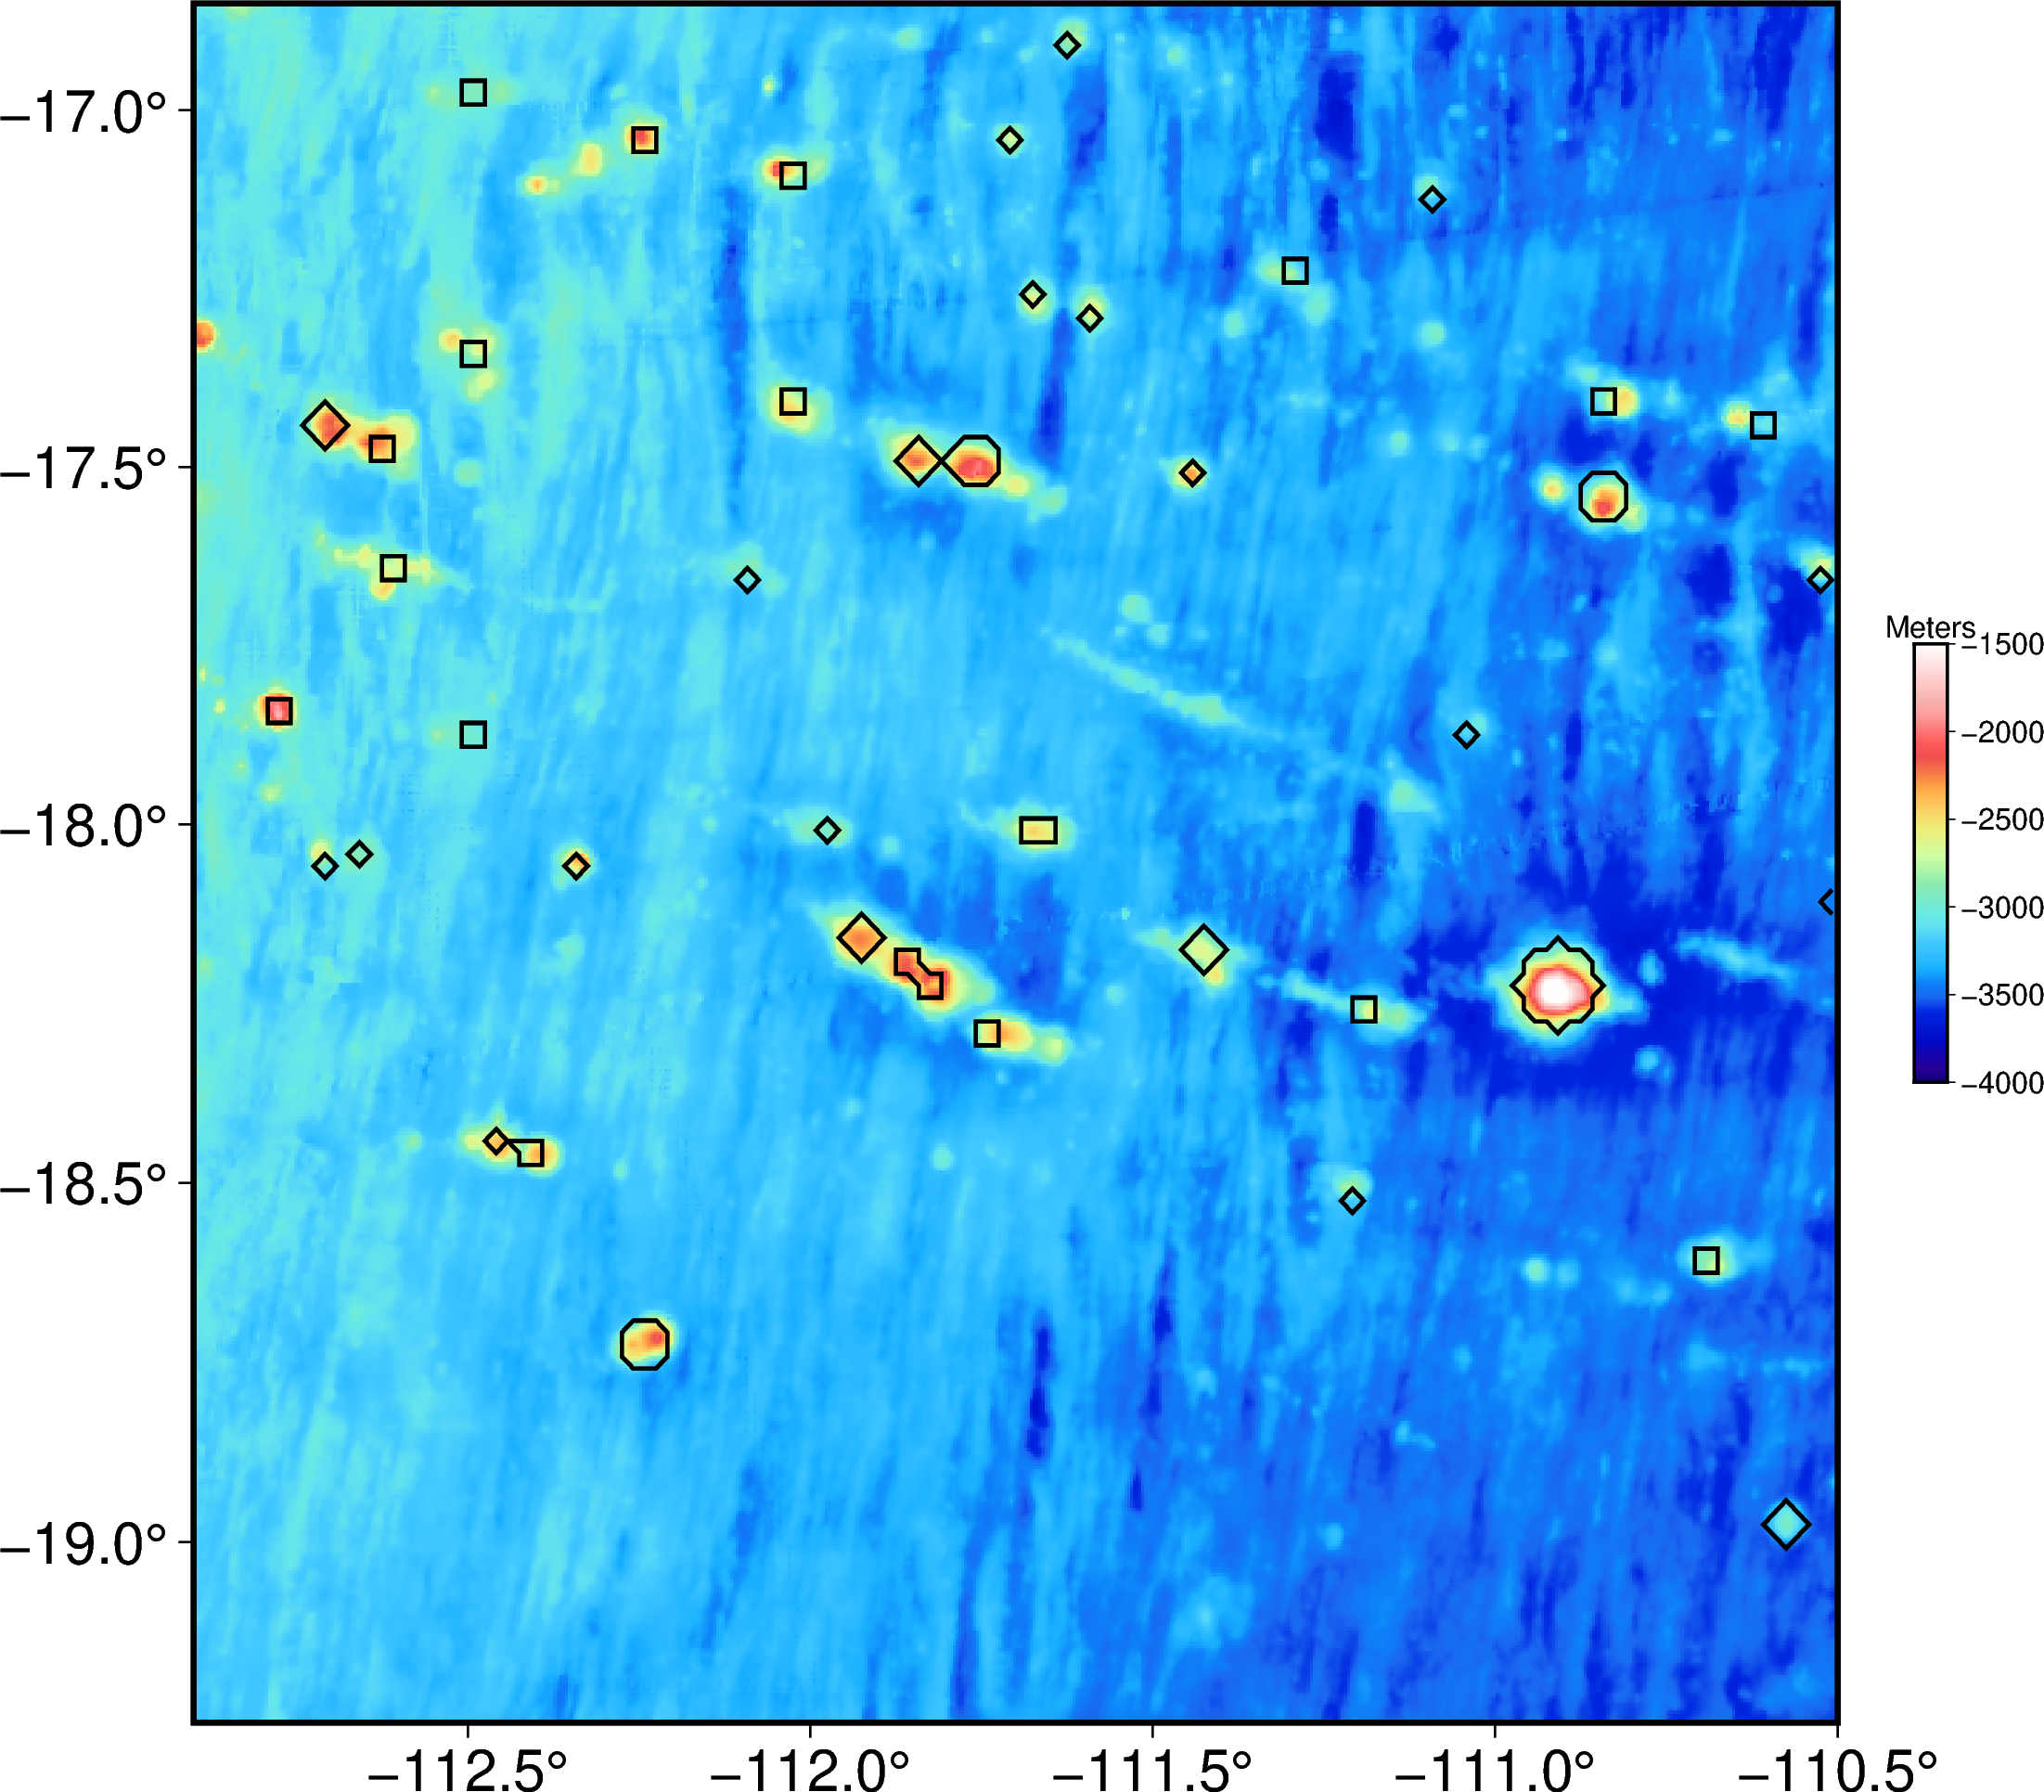

In [13]:
srtm = xr.open_dataset('data/figure_datasets/srtm_train_zone.nc')
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT_LABEL="15p,Helvetica,black", FONT_ANNOT="15p")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Helvetica,black")

############################ SWIR ##################################
pygmt.makecpt(cmap="haxby", series=[-4000, -1500, 1], background='o')
fig.grdimage(
    grid = xr.DataArray(srtm.z, coords=(srtm.lat, srtm.lon)),
    # shading = shade_SWIR,
    projection="M15c",
    region = [points[2], points[3], points[0], points[1]],
    frame=["WSrt", "xa0.5", "ya0.5"],
    cmap = True,
    )

fig.grdcontour(
    grid=xr.open_dataset('data/training_data_new.nc')['Labels'],
    annotation="200+f12p", 
    interval=1,
    pen = "1p, black",
    limit=[-3400, 2800]
    )
fig.colorbar(position="JML+o-16c/0c+w4c/0.3c+m", frame=["xa500f500", "y+lMeters"])
# old_vgg_file = xr.open_dataset("/Volumes/envisat2/SWOT/src/sandwell/grid_swot/curv_32.1.nc")
fig.show()

In [14]:
labeled_training_data = xr.open_dataset('data/training_data_new.nc')

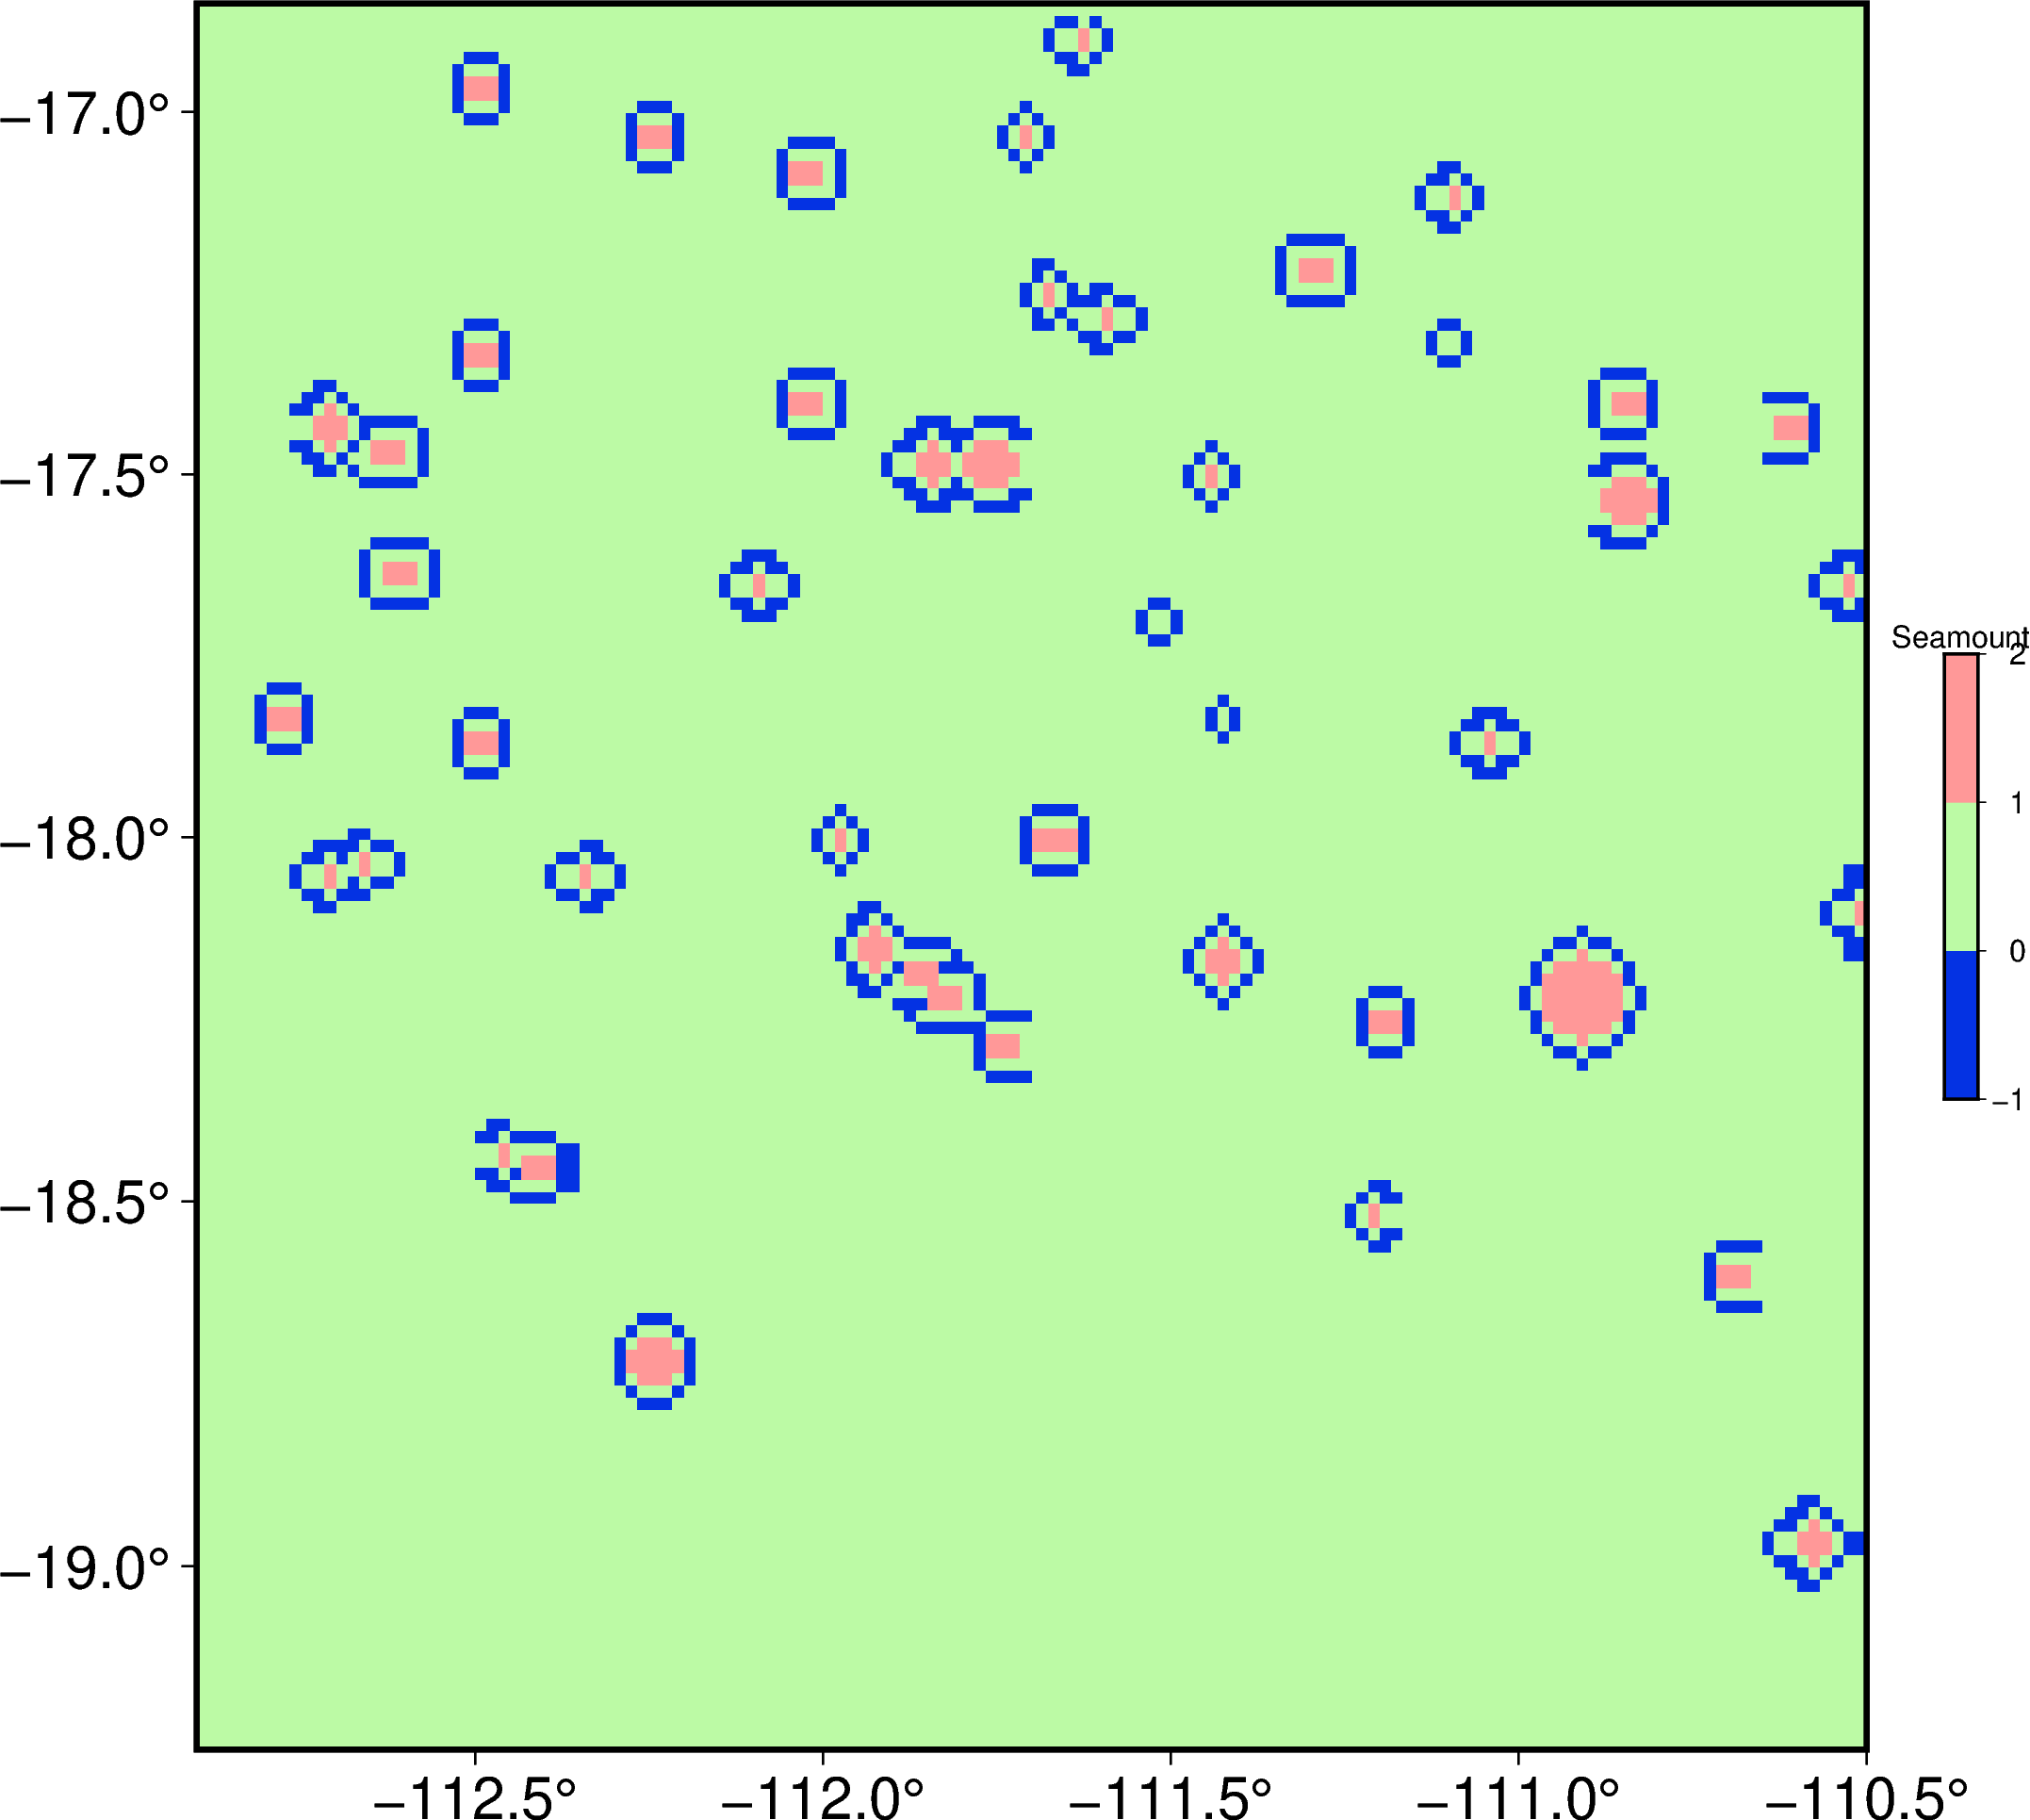

In [26]:
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT_LABEL="15p,Helvetica,black", FONT_ANNOT="15p")
pygmt.config(FONT_ANNOT_PRIMARY="15p,Helvetica,black")

############################ SWIR ##################################
pygmt.makecpt(cmap="haxby", series=[-1, 2, 1], background='o')
fig.grdimage(
    grid = xr.DataArray(labeled_training_data.Labels, coords=(labeled_training_data.lat, labeled_training_data.lon)),
    # shading = shade_SWIR,
    projection="M15c",
    region = [points[2], points[3], points[0], points[1]],
    frame=["WSrt", "xa0.5", "ya0.5"],
    cmap = True,
    )
fig.colorbar(position="JML+o-16c/0c+w4c/0.3c+m", frame=["xa1f2", "y+lSeamount"])
# old_vgg_file = xr.open_dataset("/Volumes/envisat2/SWOT/src/sandwell/grid_swot/curv_32.1.nc")
fig.show()

In [16]:
np.unique(labeled_training_data.Labels.values)

array([0, 1])